# Initial Setup and Loading Datasets

## Week 1: Set Up Development Environment and Conduct Initial Research

### Step 1: Set Up Development Environment

We start by installing the necessary Python libraries for our project. This includes pandas, numpy, matplotlib, seaborn for data manipulation and visualization, scikit-learn for machine learning tasks, nltk for natural language processing, and joblib for model saving and loading.

### Step 2: Conduct Literature Review

A literature review on harmful content detection technologies is essential to understand the current state-of-the-art methods and approaches. This will help us in designing a robust system.

### Step 3: Identify and Compile Relevant Datasets

We have identified two datasets: `fake.csv` and `true.csv`. These datasets contain news articles labeled as fake and real, respectively.

### Step 4: First Meeting with Supervisor

Discuss the project plan, gather feedback, and refine the approach.

### Initial Setup and Loading Datasets

We begin by importing the necessary libraries and downloading required NLTK resources. Then, we load the `true.csv` and `fake.csv` datasets and display the first few rows to understand their structure.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from sklearn.preprocessing import LabelEncoder

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the datasets
true_df = pd.read_csv('/content/drive/MyDrive/Internship/true.csv')
fake_df = pd.read_csv('/content/drive/MyDrive/Internship/fake.csv')

In [ ]:
# Display the first few rows of the datasets
print("True News Dataset")
true_df.head()

True News Dataset


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
print("\nFake News Dataset")
fake_df.head()


Fake News Dataset


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


# Data Preprocessing
Next, I'll preprocess the text data by cleaning, tokenizing, removing stopwords, and lemmatizing.

In [ ]:
# Add a label column to the datasets
true_df['label'] = "true"
fake_df['label'] = "fake"

# Combine the datasets
df = pd.concat([true_df, fake_df], ignore_index=True)

# Check for missing values
df.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0


Define text preprocessing function

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = text.split()
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing to the text column
df['text'] = df['text'].apply(preprocess_text)

Display the first few rows of the preprocessed dataset

In [ ]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",washington reuters head conservative republica...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,washington reuters transgender people allowed ...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,washington reuters special counsel investigati...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,washington reuters trump campaign adviser geor...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,seattlewashington reuters president donald tru...,politicsNews,"December 29, 2017",0


In [ ]:
df['text'][0]

'washington reuters head conservative republican faction u congress voted month huge expansion national debt pay tax cut called “fiscal conservative” sunday urged budget restraint 2018 keeping sharp pivot way among republican u representative mark meadow speaking cbs’ “face nation” drew hard line federal spending lawmaker bracing battle january return holiday wednesday lawmaker begin trying pas federal budget fight likely linked issue immigration policy even november congressional election campaign approach republican seek keep control congress president donald trump republican want big budget increase military spending democrat also want proportional increase nondefense “discretionary” spending program support education scientific research infrastructure public health environmental protection “the trump administration already willing say ‘we’re going increase nondefense discretionary spending 7 percent’” meadow chairman small influential house freedom caucus said program “now democrat

### Data Preprocessing

We add a `label` column to both the `true` and `fake` datasets and combine them into a single DataFrame. We then check for and drop any missing values.

To preprocess the text data, we define a function `preprocess_text` that performs the following steps:
- Convert text to lowercase
- Remove punctuation
- Tokenize the text
- Remove stopwords
- Lemmatize the tokens

We apply this function to the `text` column of our combined dataset and display the first few rows to verify the preprocessing.

# Data Exploration and Visualization
Let’s explore the data to understand its distribution and visualize some insights.

In [ ]:
import sklearn
sklearn.__version__

'1.5.2'

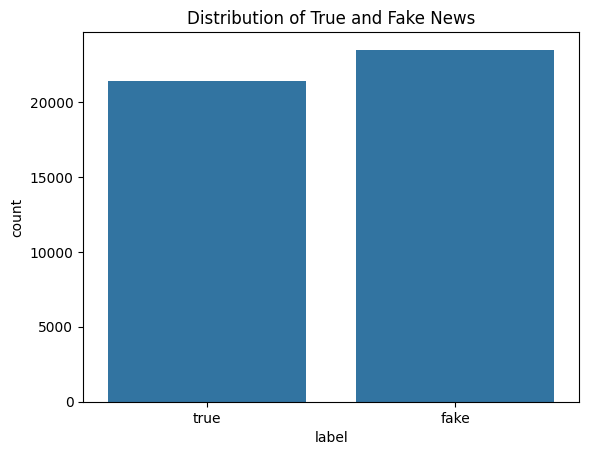

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


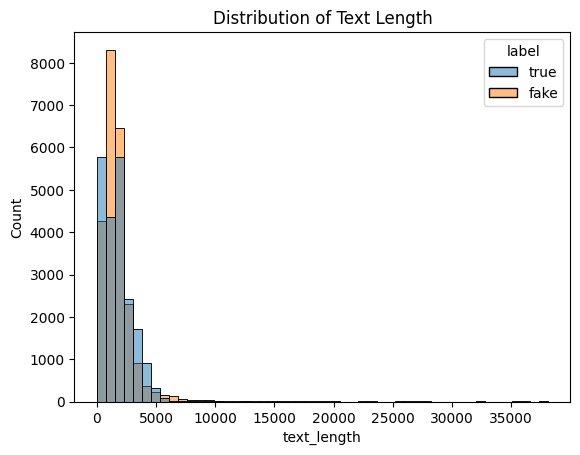

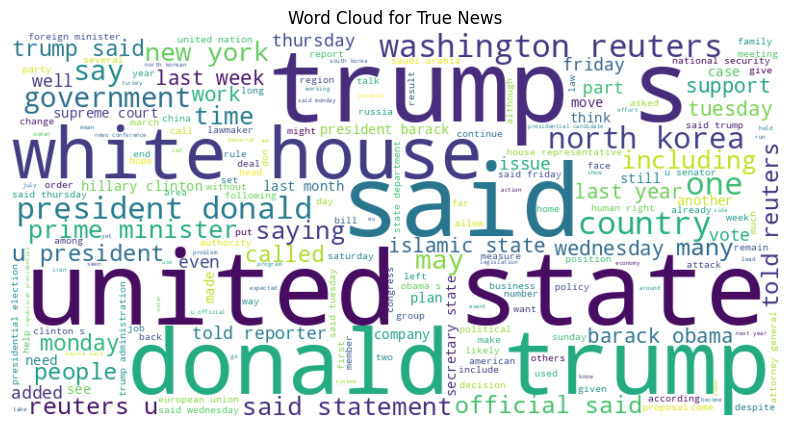

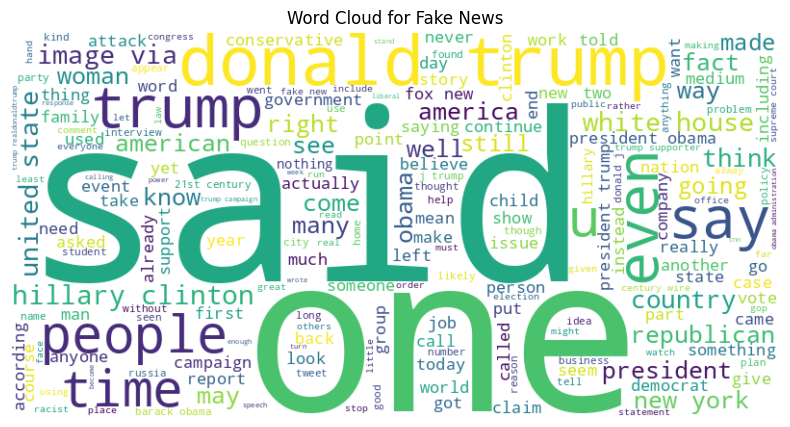

In [ ]:
# Distribution of labels
sns.countplot(x='label', data=df)
plt.title('Distribution of True and Fake News')
plt.show()

# Length of text distribution
df['text_length'] = df['text'].apply(len)
sns.histplot(data=df, x='text_length', hue='label', bins=50)
plt.title('Distribution of Text Length')
plt.show()

# Word cloud for true and fake news
from wordcloud import WordCloud

# True news word cloud
true_words = ' '.join(df[df['label'] == 'true']['text'])
true_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(true_words)

plt.figure(figsize=(10, 5))
plt.imshow(true_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for True News')
plt.axis('off')
plt.show()

# Fake news word cloud
fake_words = ' '.join(df[df['label'] == 'fake']['text'])
fake_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fake_words)

plt.figure(figsize=(10, 5))
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Fake News')
plt.axis('off')
plt.show()

### Data Exploration and Visualization

#### Label Distribution

We visualize the distribution of true and fake news using a count plot. This helps us understand the balance of our dataset.

#### Text Length Distribution

We analyze the distribution of text lengths for both true and fake news articles. This is visualized using a histogram, with different colors for true and fake news.

#### Word Clouds

We create word clouds for true and fake news articles to visualize the most common words in each category. Word clouds provide a visual representation of the frequency of words, with larger words indicating higher frequency.


# Implement fake news classifier using Logistic Regression and TfidfVectorizer
- Train and evaluate the model on the preprocessed dataset
- Document initial findings and model performance
- Third meeting with the supervisor to discuss model results and improvements

In [ ]:
# Encode labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

df

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",washington reuters head conservative republica...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,washington reuters transgender people allowed ...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,washington reuters special counsel investigati...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,washington reuters trump campaign adviser geor...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,seattlewashington reuters president donald tru...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st century wire say 21wire reported earlier ...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st century wire say familiar theme whenever ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,patrick henningsen 21st century wireremember o...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st century wire say al jazeera america go hi...,Middle-east,"January 14, 2016",0


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Build the model pipeline

In [ ]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', LogisticRegression(solver='lbfgs', max_iter=1000))
])

In [ ]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('clf', LogisticRegression(max_iter=1000))])

# Make predictions

In [ ]:
# Make predictions
y_pred = pipeline.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy}')
print('--'* 30)
print('Confusion Matrix:')
print(conf_matrix)
print()
print('--'* 30)
print('Classification Report:')
print(class_report)

Accuracy: 0.9897550111358575
------------------------------------------------------------
Confusion Matrix:
[[4585   65]
 [  27 4303]]

------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4650
           1       0.99      0.99      0.99      4330

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



# Save the model

In [ ]:
# Save the model
import joblib
joblib.dump(pipeline, '/content/drive/MyDrive/Internship/fake_news_detection_model.pkl')

['/content/drive/MyDrive/Internship/fake_news_detection_model.pkl']

# Testing the Model

In [ ]:
import joblib
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load the pretrained model
model = joblib.load('/content/drive/MyDrive/Internship/fake_news_detection_model.pkl')

In [ ]:
import warnings
warnings.filterwarnings(action='ignore', message='Nothing')

In [ ]:
import warnings
warnings.filterwarnings(action='ignore', message='Nothing')

# # Define text preprocessing function
# nltk.download('stopwords')
# nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = text.split()
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Function to predict and block content
def detect_and_block_content(text):
    # Preprocess the text
    processed_text = preprocess_text(text)

    # Predict using the model
    prediction = model.predict([processed_text])

    # Map prediction to label
    label_map = {0: 'fake', 1: 'true'}
    result = label_map[prediction[0]]

    # Block content if fake
    if result == 'fake':
        print("Content Blocked: This news article is detected as fake news.")
    else:
        print("Content Allowed: This news article is detected as true news.")

    return result

# Example usage

In [ ]:
# Example usage
sample_text = "Donald Trump just couldn't wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media."
result = detect_and_block_content(text)
print(f'Result: {result}')

Content Blocked: This news article is detected as fake news.
Result: fake


In [ ]:
sample2 = "washington reuters head conservative republican faction u congress voted month huge expansion national debt pay tax cut called “fiscal conservative” sunday urged budget restraint 2018 keeping sharp pivot way among republican u representative mark meadow speaking cbs’ “face nation” drew hard line federal spending lawmaker bracing battle january return holiday wednesday lawmaker begin trying pas federal budget fight likely linked issue immigration policy even november congressional election campaign approach republican seek keep control congress president donald trump republican want big budget increase military spending democrat also want proportional increase nondefense “discretionary” spending program support education scientific research infrastructure public health environmental protection “the trump administration already willing say ‘we’re going increase nondefense discretionary spending 7 percent’” meadow chairman small influential house freedom caucus said program “now democrat "
detect_and_block_content(sample2)

Content Allowed: This news article is detected as true news.


'true'

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = text.split()
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Function to split text into chunks using a sliding window
def split_text_sliding_window(text, chunk_size=100, overlap=20):
    words = text.split()
    chunks = []
    for i in range(0, len(words), chunk_size - overlap):
        chunk = ' '.join(words[i:i + chunk_size])
        if len(chunk.split()) >= chunk_size * 0.5:  # Ensure sufficient length
            chunks.append(chunk)
    return chunks

# Function to classify each chunk and aggregate the results
def classify_long_text(text, chunk_size=100, overlap=20):
    # Preprocess and split text into chunks
    chunks = split_text_sliding_window(text, chunk_size=chunk_size, overlap=overlap)
    chunk_predictions = []

    for chunk in chunks:
        preprocessed_chunk = preprocess_text(chunk)
        # Classify the chunk
        prediction = model.predict([preprocessed_chunk])[0]
        chunk_predictions.append(prediction)

    if 1 in chunk_predictions:
        overall_result = "Real News"
    else:
        overall_result = "Fake News"

    # Return results for each chunk and the overall classification
    return chunk_predictions, overall_result, chunks

# Example usage with long text
long_text = true_df.text[90]

# Run the classifier on the long text
chunk_predictions, overall_result, chunks = classify_long_text(long_text)

# Display the results
print("Chunk-by-chunk classifications:", chunk_predictions)
print("Overall classification:", overall_result)


Chunk-by-chunk classifications: [1]
Overall classification: Real News


In [ ]:
true_df.text[90]

'WASHINGTON (Reuters) - U.S. Vice President Mike Pence will preside over the Senate’s vote on sweeping tax legislation, his office confirmed on Tuesday. “The @VP will preside over the historic vote,” Alyssa Farah, a spokeswoman for Pence, said on Twitter. Republicans may need Pence’s vote in favor of the legislation to break a tie. '

In [ ]:
import requests
from bs4 import BeautifulSoup
def fetch_article_content(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            paragraphs = soup.find_all('p')
            text = ' '.join([para.get_text() for para in paragraphs])
            return text
        else:
            print(f"Failed to fetch {url} - Status Code: {response.status_code}")
            return None
    except Exception as e:
        print(f"Error fetching {url}: {e}")
        return None

In [ ]:
text = fetch_article_content("https://www.rt.com/pop-culture/603677-helldivers-democracy-rise-fall/")

In [ ]:
text

'British Actress Dame Maggie Smith has died at the age of 89, her family has announced. The Academy Award-winner, widely known for her roles in the Harry Potter films and the Downton Abbey series, is said to have died peacefully in hospital\xa0on Friday. Smith’s sons, Chris Larkin and Toby Stephens, confirmed her death in a statement, noting that the actress was “with family and friends at the end.” “She leaves two sons and five loving grandchildren who are devastated by the loss of their extraordinary mother and grandmother,” the brothers wrote, thanking the staff at Chelsea and Westminster Hospital for caring for the actress in her final days. “We thank you for all your kind messages and support and ask that you respect our privacy at this time.” Born in 1934, Smith had an extensive career both in film and on stage, and was widely recognized for her wit in comedic roles. She was considered one of Britain’s most prolific and recognizable actresses. Throughout her nearly seven-decade c

In [ ]:
# Run the classifier on the long text
chunk_predictions, overall_result, chunks = classify_long_text(text)

# Display the results
print("Chunk-by-chunk classifications:", chunk_predictions)
print("Overall classification:", overall_result)


Chunk-by-chunk classifications: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Overall classification: Fake News


In [ ]:
chunks


['A Canadian software designer has denied that he’s the creator of Bitcoin following the release of a documentary claiming to have solved the mystery surrounding the world’s most popular cryptocurrency. ‘Money Electric: The Bitcoin Mystery’, released on Tuesday on US television network HBO, claims that Peter Todd, a Toronto-based contributor to the digital currency’s core programming, is in fact Satoshi Nakamato, the person who founded Bitcoin in 2009. Satoshi stopped posting online and largely disappeared from public life in 2011. The 39-year-old Canadian, who was involved in developing Bitcoin during its early years, has since denied the claim. “I’m not',
 'The 39-year-old Canadian, who was involved in developing Bitcoin during its early years, has since denied the claim. “I’m not Satoshi,” Todd wrote in an email to Time magazine. “I discovered Bitcoin first from reading the white paper, as I’ve said publicly many times,” he added. The 100-minute documentary presents largely circumst

In [ ]:
len(chunks)

8

In [ ]:
for i in chunks:
  print(i)

(Reuters) - A U.S. appeals court on Friday said President Donald Trump’s hotly contested travel ban targeting people from six Muslim-majority countries should not be applied to people with strong U.S. ties. The 9th U.S. Circuit Court of Appeals, which covers several West Coast states, also said its ruling would be put on hold pending a decision on the latest version of the travel ban from the Trump administration by the U.S. Supreme Court. Since taking office in January, Trump has been struggling to enact a ban that passes court muster. A three-judge panel from the 9th Circuit narrowed a
has been struggling to enact a ban that passes court muster. A three-judge panel from the 9th Circuit narrowed a previous injunction from a lower federal court to those people “with a credible bona fide relationship with the United States.” It also said that while the U.S. president has broad powers to regulate the entry of immigrants into the United States, those powers are not without limits. “We con

## Training Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
pipeline2 = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', RandomForestClassifier(n_estimators = 100))
])
pipeline2.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('clf', RandomForestClassifier())])

In [ ]:
#Evaluate the model
y_pred2 = pipeline2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
conf_matrix = confusion_matrix(y_test, y_pred2)
class_report = classification_report(y_test, y_pred2)
print(f'Accuracy: {accuracy}')
print('--'* 30)
print('Confusion Matrix:')
print(conf_matrix)
print()
print('--'* 30)
print('Classification Report:')
print(class_report)

Accuracy: 0.9977728285077951
------------------------------------------------------------
Confusion Matrix:
[[4636   14]
 [   6 4324]]

------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4650
           1       1.00      1.00      1.00      4330

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [ ]:
# Save the model
import joblib
joblib.dump(pipeline2, '/content/drive/MyDrive/Internship/fake_news_detection_rf_model.pkl')

['/content/drive/MyDrive/Internship/fake_news_detection_rf_model.pkl']

In [ ]:
import joblib
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load the pretrained model
model = joblib.load('/content/drive/MyDrive/Internship/fake_news_detection_rf_model.pkl')

In [ ]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = text.split()
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Function to split text into chunks using a sliding window
def split_text_sliding_window(text, chunk_size=100, overlap=20):
    words = text.split()
    chunks = []
    for i in range(0, len(words), chunk_size - overlap):
        chunk = ' '.join(words[i:i + chunk_size])
        if len(chunk.split()) >= chunk_size * 0.5:  # Ensure sufficient length
            chunks.append(chunk)
    return chunks

# Function to classify each chunk and aggregate the results
def classify_long_text(text, chunk_size=100, overlap=20):
    # Preprocess and split text into chunks
    chunks = split_text_sliding_window(text, chunk_size=chunk_size, overlap=overlap)
    chunk_predictions = []

    for chunk in chunks:
        preprocessed_chunk = preprocess_text(chunk)
        # Classify the chunk
        prediction = model.predict([preprocessed_chunk])[0]
        chunk_predictions.append(prediction)

    # Aggregate results (e.g., consider the text as "Fake" if 50% or more chunks are classified as fake)
    fake_percentage = sum(chunk_predictions) / len(chunk_predictions)
    overall_result = "Fake News" if fake_percentage <= 0.5 else "Real News"

    # Return results for each chunk and the overall classification
    return chunk_predictions, overall_result, chunks

# Example usage with long text
long_text = true_df.text[15]

# Run the classifier on the long text
chunk_predictions, overall_result, chunks = classify_long_text(long_text)

# Display the results
print("Chunk-by-chunk classifications:", chunk_predictions)
print("Overall classification:", overall_result)


Chunk-by-chunk classifications: [1, 0, 0, 0, 1]
Overall classification: Fake News


### Training BERT Model

In [ ]:
train_texts, val_texts, train_labels, val_labels = train_test_split(df['text'], df['label'], test_size=0.2)

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True, max_length=512)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
import torch

class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create torch datasets
train_dataset = NewsDataset(train_encodings, train_labels.tolist())
val_dataset = NewsDataset(val_encodings, val_labels.tolist())


In [ ]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

# Load the BERT model with a classification head
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',  # Where to save the model
    num_train_epochs=1,  # Number of epochs
    per_device_train_batch_size=8,  # Batch size for training
    per_device_eval_batch_size=16,  # Batch size for evaluation
    warmup_steps=500,  # Warmup steps to prevent early overfitting
    weight_decay=0.01,  # Weight decay for regularization
    logging_dir='./logs',  # Directory for logging
    logging_steps=10,
    evaluation_strategy="epoch"  # Evaluate at the end of every epoch
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# Fine-tune the model
trainer.train()

# Save the fine-tuned model
model.save_pretrained('/content/drive/MyDrive/Internship/fine_tuned_bert_fake_news')
tokenizer.save_pretrained('/content/drive/MyDrive/Internship/fine_tuned_bert_fake_news')


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.000000,0.004841


('/content/drive/MyDrive/Internship/fine_tuned_bert_fake_news/tokenizer_config.json',
 '/content/drive/MyDrive/Internship/fine_tuned_bert_fake_news/special_tokens_map.json',
 '/content/drive/MyDrive/Internship/fine_tuned_bert_fake_news/vocab.txt',
 '/content/drive/MyDrive/Internship/fine_tuned_bert_fake_news/added_tokens.json')

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, pipeline

# Load pre-trained model and tokenizer
model_name = '/content/drive/MyDrive/Internship/fine_tuned_bert_fake_news'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Example: Long text with potential real and fake news mixed
long_text = fake_df.text[0]

# Segment the text into sentences (you can split into paragraphs or other chunks)
sentences = long_text.split('.')

# Pipeline for fake news classification
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)

highlighted_text = []

# Check each sentence for fake news
for sentence in sentences:
    if sentence.strip():  # Skip empty sentences
        result = classifier(sentence)  # Predict if the sentence contains fake news
        label = result[0]['label']  # 'LABEL_1' for fake news, 'LABEL_0' for real news

        if label == 'LABEL_1':  # Assuming 'LABEL_1' indicates fake news
            highlighted_text.append(f"[FAKE NEWS] {sentence}")
            fake_news_detected = True
        else:
            highlighted_text.append(sentence)

# Combine the sentences back into a single text
final_text = ' '.join(highlighted_text)
# Print if fake news was detected
if fake_news_detected:
    print("\nFake news was detected in the text!")
else:
    print("\nNo fake news detected.")

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.



Fake news was detected in the text!


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, pipeline

# Load pre-trained model and tokenizer
model_name = '/content/drive/MyDrive/Internship/fine_tuned_bert_fake_news'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Example: Long text with potential real and fake news mixed
long_text = long_text = """
Vaccines are safe and effective for preventing diseases. However, there are some claims that vaccines cause autism, which has been disproven by scientific studies.
In other news, climate change is a hoax and has been fabricated by the government.
"""

# Segment the text into sentences (you can split into paragraphs or other chunks)
sentences = true_df.text[22]


# Pipeline for fake news classification
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)

result = classifier(sentence)  # Predict if the sentence contains fake news
label = result[0]['label']  # 'LABEL_1' for fake news, 'LABEL_0' for real news

if label == 'LABEL_1':  # Assuming 'LABEL_1' indicates fake news
    print("\nFake news was detected in the text!")
else:
    print("\nNo fake news detected.")

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.



Fake news was detected in the text!


In [ ]:
label

'LABEL_1'

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the validation set
val_preds = trainer.predict(val_dataset)

# Get true labels and predicted labels
true_labels = val_preds.label_ids
predicted_labels = np.argmax(val_preds.predictions, axis=1)

# Compute confusion matrix
print(confusion_matrix(true_labels, predicted_labels))

# Classification report
print(classification_report(true_labels, predicted_labels))


[[4310    1]
 [   3 4666]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4311
           1       1.00      1.00      1.00      4669

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [ ]:
df.label.value_counts()

,count
label,
1,23481
0,21417


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

# Load pre-trained BERT model and tokenizer
model_name = "/content/drive/MyDrive/Internship/fine_tuned_bert_fake_news"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Load the text you want to check
long_text = true_df.text[11]

# Inference pipeline
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)

# Check for fake news, ensuring truncation/chunking within the pipeline
# The text will be automatically truncated or chunked to fit the model's maximum input length
result = classifier(long_text, truncation=True)

print(result)  # Output will show whether it's fake or not

[{'label': 'LABEL_0', 'score': 0.9999964237213135}]


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, pipeline
import torch
import numpy as np

# Load pre-trained model and tokenizer
model_name = "/content/drive/MyDrive/Internship/fine_tuned_bert_fake_news"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Example: Long text with potential real and fake news mixed
long_text = true_df.text[0]  # Assuming this is your long text

# Sliding window tokenization
def sliding_window_tokenize(text, tokenizer, max_length=512, stride=256):
    tokens = tokenizer(text, return_tensors='pt', truncation=False)['input_ids'][0]  # Tokenize without truncating
    chunks = []

    # Create overlapping chunks
    for i in range(0, len(tokens), stride):
        chunk = tokens[i:i+max_length]
        if len(chunk) < max_length:
            # Pad the last chunk if it's smaller than max_length
            chunk = torch.cat([chunk, torch.tensor([tokenizer.pad_token_id] * (max_length - len(chunk)))])
        chunks.append(chunk.unsqueeze(0))  # Add batch dimension
    return chunks

# Function to classify the chunks
def classify_chunks(chunks, model):
    fake_news_detected = False
    for chunk in chunks:
        with torch.no_grad():  # Disable gradient calculation for inference
            outputs = model(chunk)
            logits = outputs.logits
            predictions = torch.softmax(logits, dim=-1)
            predicted_label = torch.argmax(predictions, dim=1).item()  # Get label (0 = real, 1 = fake)
            confidence = predictions[0][predicted_label].item()  # Get confidence score for predicted label

            if predicted_label == 1:  # Assuming '1' is fake news
                fake_news_detected = True
                print(f"Fake news detected with confidence: {confidence:.2f}")
                break  # Early exit if fake news is found
    return fake_news_detected

# Tokenize the long text using sliding window approach
tokenized_chunks = sliding_window_tokenize(long_text, tokenizer)

# Classify the chunks
fake_news_found = classify_chunks(tokenized_chunks, model)

if fake_news_found:
    print("Fake news detected in the text.")
else:
    print("No fake news detected in the text.")


Token indices sequence length is longer than the specified maximum sequence length for this model (945 > 512). Running this sequence through the model will result in indexing errors
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


No fake news detected in the text.


In [ ]:
long_text = true_df.text[13]
def sliding_window_tokenize(text, tokenizer, max_length=512, stride=256):
    tokens = tokenizer(text, return_tensors='pt', truncation=False)['input_ids'][0]  # Tokenize without truncating
    chunks = []

    # Create overlapping chunks
    for i in range(0, len(tokens), stride):
        chunk = tokens[i:i+max_length]
        if len(chunk) < max_length:
            # Pad the last chunk if it's smaller than max_length
            chunk = torch.cat([chunk, torch.tensor([tokenizer.pad_token_id] * (max_length - len(chunk)))])
        chunks.append(chunk.unsqueeze(0))  # Add batch dimension
    return chunks

# Function to classify the chunks and print each chunk and its classification label
def classify_chunks(chunks, model, tokenizer):
    fake_news_detected = False

    for i, chunk in enumerate(chunks):
        with torch.no_grad():  # Disable gradient calculation for inference
            outputs = model(chunk)
            logits = outputs.logits
            predictions = torch.softmax(logits, dim=-1)
            predicted_label = torch.argmax(predictions, dim=1).item()  # Get label (0 = real, 1 = fake)
            confidence = predictions[0][predicted_label].item()  # Get confidence score for predicted label

            # Convert chunk back to text for printing
            chunk_text = tokenizer.decode(chunk[0], skip_special_tokens=True)
            print(f"Chunk {i+1}:")
            print(chunk_text)
            print(f"Classification: {'Fake News' if predicted_label == 1 else 'Real News'}")
            print(f"Confidence: {confidence:.2f}")
            print("-" * 50)  # Separator between chunks

            if predicted_label == 1:  # Assuming '1' is fake news
                fake_news_detected = True

    return fake_news_detected

# Tokenize the long text using sliding window approach
tokenized_chunks = sliding_window_tokenize(long_text, tokenizer)

# Classify the chunks and print each chunk with its label
fake_news_found = classify_chunks(tokenized_chunks, model, tokenizer)

if fake_news_found:
    print("Fake news detected in the text.")
else:
    print("No fake news detected in the text.")

Chunk 1:
the following statements were posted to the verified twitter accounts of u. s. president donald trump, @ realdonaldtrump and @ potus. the opinions expressed are his own. reuters has not edited the statements or confirmed their accuracy. @ realdonaldtrump : - “ on 1 / 20 - the day trump was inaugurated - an estimated 35, 000 isis fighters held approx 17, 500 square miles of territory in both iraq and syria. as of 12 / 21, the u. s. military estimates the remaining 1, 000 or so fighters occupy roughly 1, 900 square miles... ” via @ jamiejmcintyre [ 1749 est ] - just left west palm beach fire & rescue # 2. met with great men and women as representatives of those who do so much for all of us. firefighters, paramedics, first responders - what amazing people they are! [ 1811 est ] - “ on 1 / 20 - the day trump was inaugurated - an estimated 35, 000 isis fighters held approx 17, 500 square miles of territory in both iraq and syria. as of 12 / 21, the u. s. military est the remaining 